## Import Libraries

In [1]:
#!pip install nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb
from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [13]:
##A new window should open, showing the NLTK Downloader.
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
treebank_corpus = treebank.tagged_sents(tagset='universal') 
brown_corpus = brown.tagged_sents(tagset='universal')
conll_corpus = conll2000.tagged_sents(tagset='universal')
tagged_sentences = treebank_corpus + conll_corpus

In [3]:
len(tagged_sentences) #no of sentances

14862

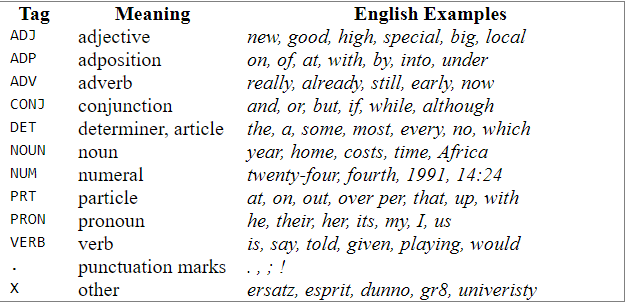

In [4]:
tagged_sentences[1] # a look into what the sentaces look like

[('Mr.', 'NOUN'),
 ('Vinken', 'NOUN'),
 ('is', 'VERB'),
 ('chairman', 'NOUN'),
 ('of', 'ADP'),
 ('Elsevier', 'NOUN'),
 ('N.V.', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Dutch', 'NOUN'),
 ('publishing', 'VERB'),
 ('group', 'NOUN'),
 ('.', '.')]

### Divide into words and Tags

In [5]:
X=[] # for appending sentances 
Y=[]
for sent in tagged_sentences:
    X_sent=[] # for appending words
    Y_sent=[]
    for word in sent:
        X_sent.append(word[0])
        Y_sent.append(word[1])
    X.append(X_sent)
    Y.append(Y_sent)

In [6]:
for i in range(4):
    print(X[i])
    print(Y[i])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.']
['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', ',', 'the', 'Dutch', 'publishing', 'group', '.']
['NOUN', 'NOUN', 'VERB', 'NOUN', 'ADP', 'NOUN', 'NOUN', '.', 'DET', 'NOUN', 'VERB', 'NOUN', '.']
['Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', '*-1', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', 'CONJ', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'NOUN', 'NOUN', '.', 'VERB', 'VERB', 'X', 'DET', 'ADJ', 'NOUN', 'ADP', 'DET', 'ADJ', 'ADJ', 'NOUN', '.']
['A', 'form', 'of', 'asbestos', 'once', 'used', '*', '*', 'to', 'make', 'Kent', 

In [7]:
len(X) ## no of sentances

14862

In [8]:
num_words=len(set([word.lower() for sent in X for word in sent]))
num_tags=len(set([tag.lower() for sent in Y for tag in sent]))

In [9]:
print(num_words)#unique no of words
print(num_tags)#unique no of tags

23562
12


### Vectorize the Data

In [10]:
#encode X
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(X)
X_encoded=word_tokenizer.texts_to_sequences(X) #value of array is index of word in dictionary 
X_encoded_one=word_tokenizer.texts_to_matrix(X,mode='binary')

In [11]:
print(X_encoded[1])
print(len(X[1]))
print(len(X_encoded[1]))

[27, 8865, 15, 149, 4, 12449, 7065, 1, 2, 2828, 1259, 116, 3]
13
13


In [12]:
print(X_encoded_one[1])
print(len(X[1]))
print(len(X_encoded_one[1])) # len of single sentance is padded in whole dictionary words (num of words)

[0. 1. 1. ... 0. 0. 0.]
13
23563


In [13]:
#encode Y
tag_tokenizer=Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded=tag_tokenizer.texts_to_sequences(Y)

In [14]:
len(Y_encoded[1])

13

### Pad Sequences

Since the input to our feed forward network can't be variable we will pad them to be same.\
The longest sentance would be chosen and according to it's length other sentances would be padded.

In [15]:
## Find out the maximum Length
maxi=0
for i in range(len(X)):
    maxi=max(len(X[i]),maxi)

In [16]:
maxi

271

In [17]:
X_padded=pad_sequences(X_encoded,maxlen=maxi,padding='pre',truncating='post') # adding zeros before
Y_padded=pad_sequences(Y_encoded,maxlen=maxi,padding='pre',truncating='post') #adding zeros before

In [18]:
X_padded[1] #[27, 8865, 15, 149, 4, 12449, 7065, 1, 2, 2828, 1259, 116, 3]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [19]:
## Proof of padding
for i in range(5):
    print(len(X_padded[i]))

271
271
271
271
271


In [20]:
len(word_tokenizer.word_index) # total no of words

23562

In [21]:
word2id=word_tokenizer.word_index  # mapping of index to words

In [39]:
count=0
for i,j in word2id.items():
    print(i,"\t",j)
    count+=1
    if(count==10):
        break

, 	 1
the 	 2
. 	 3
of 	 4
to 	 5
a 	 6
in 	 7
and 	 8
for 	 9
's 	 10


### Word Embeddings

Dimensions of a word embedding is: (VOCABULARY_SIZE, EMBEDDING_DIMENSION) 
Example of Word Embeddings


| features | King | Queen |
|----------|------|-------|
| Gender   | 1    |  -1   |
| Hieght   | 1    |  0.75 | 

In [41]:
#!pip install gensim
from gensim.models import KeyedVectors

In [42]:
# Download From https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
path = 'GoogleNews-vectors-negative300.bin'
# load word2vec using the following function present in the gensim library
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [43]:
#demonstration of  what word2vec can do
word2vec.most_similar('Toothpaste')

[('toothpaste', 0.6932885646820068),
 ('toothpastes', 0.6271893382072449),
 ('tooth_paste', 0.6087831258773804),
 ('Toothpastes', 0.6005285382270813),
 ('Sensodyne', 0.5976223349571228),
 ('Whitening', 0.587727963924408),
 ('Aquafresh_Extreme_Clean', 0.5863484740257263),
 ('Tartar_Control', 0.5816381573677063),
 ('Deodorant', 0.5793443322181702),
 ('whitening_toothpaste', 0.5768619775772095)]

In [44]:
len(word_tokenizer.word_index)+1

23563

In [45]:
import numpy as np
Embedding_size= 300 # 300 dimensions 
Vocab_size=len(word_tokenizer.word_index)+1
#create an empty array of fit dimension
embedding_weights=np.zeros((Vocab_size,Embedding_size))

word2id=word_tokenizer.word_index
count=0
not_present=[]
for word,index in word2id.items():
    try:
        embedding_weights[index,:]=word2vec[word]
    except KeyError:
        not_present.append(word)
        count+=1
        pass

In [46]:
not_present[:5]

[',', '.', 'of', 'to', 'a']

In [47]:
print(len(word_tokenizer.word_index)-count,"These many words were present in word2vec")

15782 These many words were present in word2vec


In [48]:
## Change Y_padded to one_hot_encoding
import tensorflow as tf
Y_one=tf.keras.utils.to_categorical(
    Y_padded)

In [49]:
# for each sentance there are 271 shaped array denoting word index which inturn for each word there is 13 shaped
# array denoting possible 13 tags for a single word
Y_one.shape 

(14862, 271, 13)

In [50]:
# 14862 sentances , each sentance is a vector of size 271
X_padded.shape

(14862, 271)

### LSTM Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from tensorflow.keras.models import Model

In [52]:
lstm_model=Sequential()
lstm_model.add(Embedding(input_dim=num_words+1,output_dim=300,input_length=271,weights=[embedding_weights],trainable=True))
lstm_model.add(LSTM(64,return_sequences=True))
lstm_model.add(TimeDistributed(Dense(13,activation='softmax')))

In [53]:
lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [54]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 271, 300)          7068900   
_________________________________________________________________
lstm (LSTM)                  (None, 271, 64)           93440     
_________________________________________________________________
time_distributed (TimeDistri (None, 271, 13)           845       
Total params: 7,163,185
Trainable params: 7,163,185
Non-trainable params: 0
_________________________________________________________________


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y_one, test_size=0.2, random_state=4)

In [56]:
history=lstm_model.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
186/186 [==============================] - 19s 80ms/step - loss: 0.7945 - acc: 0.9237 - val_loss: 0.1557 - val_acc: 0.9493
Epoch 2/10
186/186 [==============================] - 14s 76ms/step - loss: 0.1230 - acc: 0.9667 - val_loss: 0.0560 - val_acc: 0.9876
Epoch 3/10
186/186 [==============================] - 14s 76ms/step - loss: 0.0442 - acc: 0.9910 - val_loss: 0.0255 - val_acc: 0.9957
Epoch 4/10
186/186 [==============================] - 14s 76ms/step - loss: 0.0192 - acc: 0.9971 - val_loss: 0.0162 - val_acc: 0.9963
Epoch 5/10
186/186 [==============================] - 14s 76ms/step - loss: 0.0117 - acc: 0.9976 - val_loss: 0.0132 - val_acc: 0.9964
Epoch 6/10
186/186 [==============================] - 14s 77ms/step - loss: 0.0090 - acc: 0.9977 - val_loss: 0.0118 - val_acc: 0.9965
Epoch 7/10
186/186 [==============================] - 15s 78ms/step - loss: 0.0075 - acc: 0.9979 - val_loss: 0.0110 - val_acc: 0.9967
Epoch 8/10
186/186 [==============================] - 14s 77ms

### Plot Accuracy Graph

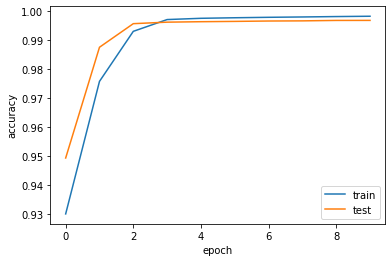

In [58]:
import matplotlib.pyplot as plt
train_acc=history.history['acc']
test_acc=history.history['val_acc']
epochs=range(10)
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")

### Predictions

In [59]:
#divide to vectors and then pad to maxlen
def get_label(text):
    text=[text]
    word_tokenizer=Tokenizer()
    word_tokenizer.fit_on_texts(X)
    text_encoded=word_tokenizer.texts_to_sequences(text) 
    text_padded=pad_sequences(text_encoded,maxlen=maxi,padding='pre',truncating='post')
    print(text_padded)
    return lstm_model.predict(text_padded),text_padded,tag_tokenizer.word_index

In [60]:
k,text_padded,tag_index=get_label('Mr.Vinken is the chairman of a large company')

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [61]:
text_padded=text_padded.reshape(-1)

In [62]:
k=k.reshape(271,13)

In [63]:
word_index=word_tokenizer.word_index

In [65]:
words=[]
for val in text_padded:
    if(val in word_index.values()):
        words.append(list(word_index.keys())[list(word_index.values()).index(val)])

In [66]:
words

['mr', 'vinken', 'is', 'the', 'chairman', 'of', 'a', 'large', 'company']

In [67]:
temp=[]
for val in np.argmax(k,axis=1):
    for key,value in tag_index.items():
        if (val==value):
            temp.append(key)        

In [68]:
temp

['noun', 'noun', 'verb', 'det', 'noun', 'adp', 'det', 'adj', 'noun']

In [69]:
mapping={}
for i,j in zip(words,temp):
    mapping[i]=j

In [70]:
mapping

{'mr': 'noun',
 'vinken': 'noun',
 'is': 'verb',
 'the': 'det',
 'chairman': 'noun',
 'of': 'adp',
 'a': 'det',
 'large': 'adj',
 'company': 'noun'}

In [72]:
lstm_model.save('lstm_model')

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


In [75]:
import pickle
with open('words_fit','wb') as file:
    pickle.dump(X,file)